# Chi-squared on a histogram

Let's see what chi-squared tells us about data on a histogram.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

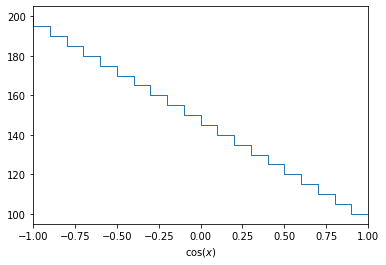

In [134]:
# model
pred = np.genfromtxt('chisq_model.txt', delimiter=',')    # read in file
x = np.array([n[0] for n in pred])    # get x values
pred_y = [n[1] for n in pred]    # get y values
plt.xlim(-1,1)
plt.xlabel(r'$\cos (x)$')
plt.plot(x,pred_y,linewidth=1,drawstyle='steps')

In [121]:
yerr = np.random.normal(scale=2,size=len(x))+8
def plot_error(y):
    plt.errorbar(x,y,yerr=yerr,ecolor='k',elinewidth=1,capsize=4,linestyle='')

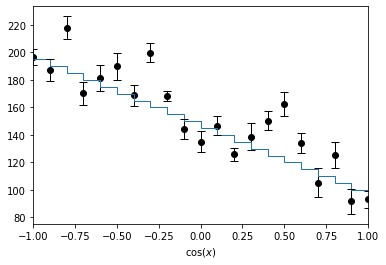

In [135]:
data1 = np.loadtxt('chisq_data1.txt', delimiter=',')    # read in file
plt.xlim(-1,1)
plt.xlabel(r'$\cos (x)$')
plt.plot(x,pred_y,linewidth=1,drawstyle='steps')
plt.scatter(x,data1,c='k')
plot_error(data1)

In [136]:
chi2,p = chisquare(data1,pred_y)
print("Chi-squared:",chi2)
print("Probability: {:.4%}".format(p)) #a bit dodgy!

Chi-squared: 39.69160552081839
Probability: 0.5463%


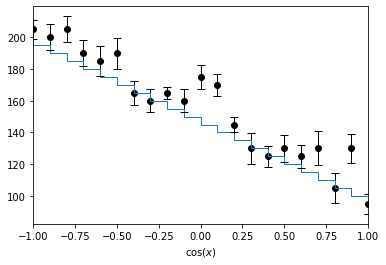

In [137]:
data2 = np.loadtxt('chisq_data2.txt', delimiter=',')    # read in file
plt.xlim(-1,1)
plt.xlabel(r'$\cos (x)$')
plt.plot(x,pred_y,linewidth=1,drawstyle='steps')
plt.scatter(x,data2,c='k')
plot_error(data2)

In [138]:
chi2,p = chisquare(data2,pred_y)
print("Chi-squared:",chi2)
print("Probability: {:.2%}".format(p)) #quite consistent!

Chi-squared: 21.440852814319058
Probability: 37.16%


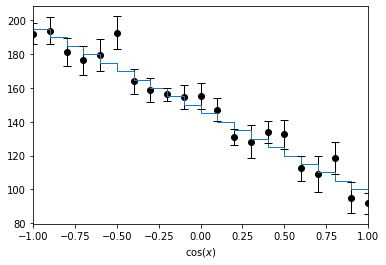

In [139]:
data3 = np.loadtxt('chisq_data3.txt', delimiter=',')    # read in file
plt.xlim(-1,1)
plt.xlabel(r'$\cos (x)$')
plt.plot(x,pred_y,linewidth=1,drawstyle='steps')
plt.scatter(x,data3,c='k')
plot_error(data3)

In [140]:
chi2,p = chisquare(data3,pred_y)
print("Chi-squared:",chi2)
print("Probability: {:.2%}".format(p)) #too consistent...

Chi-squared: 8.205210261052239
Probability: 99.04%
